# Linear Regression with Multiple Variables

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('homeprices.csv')

In [3]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [4]:
df['bedrooms'].median()

3.5

In [5]:
import math
df['bedrooms']=df['bedrooms'].fillna(math.floor(df['bedrooms'].median()))
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [6]:
reg = linear_model.LinearRegression()

In [7]:
reg.fit(df[['area','bedrooms','age']],df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
reg.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [9]:
reg.intercept_

383724.9999999998

### y = m1 * $x_{0}$ + m2 * $x_{1}$ + m3 * $x_{2}$ + b
### y = m1 * age + m2 * bedrooms + m3 * age + b
* m1 = 137.25
* m2 = -26025.0
* m3 = -6825.0
* b = 383724.9999999998

In [10]:
reg.predict([[3200,3.0,18]])

array([622000.])

In [11]:
df_actual_price = df.iloc[:,-1]
df_actual_price = pd.DataFrame(df_actual_price)
df_actual_price

,price
0,550000
1,565000
2,610000
3,595000
4,760000


In [12]:
df_actual = df.drop('price',axis=1)
df_actual

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,3.0,18
3,3600,3.0,30
4,4000,5.0,8


In [13]:
p = pd.DataFrame(reg.predict(df_actual),columns=['Predicted'])

In [14]:
p['Actual Price'] = df_actual_price

In [15]:
p

,Predicted,Actual Price
0,526000.0,550000
1,589000.0,565000
2,622000.0,610000
3,595000.0,595000
4,748000.0,760000


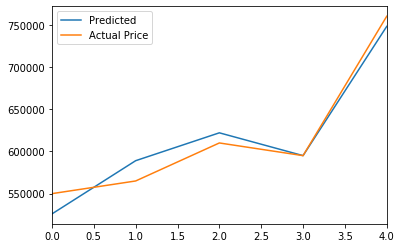

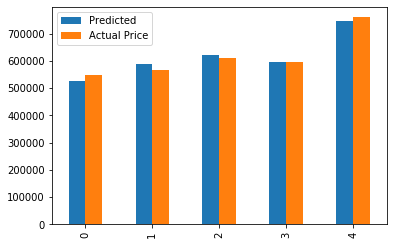

In [16]:
p.plot()
p.plot(kind='bar')
plt.show()

In [18]:
print('Mean squared error: %.2f'
      % mean_squared_error(df_actual_price, p['Predicted']))
print('Coefficient of determination: %.2f'
      % r2_score(df_actual_price, p['Predicted']))

Mean squared error: 288000000.00
Coefficient of determination: 0.95


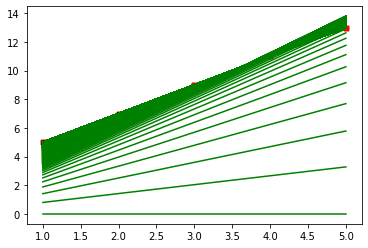

In [21]:
import numpy as np

def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 10000
    n = len(x)
    learning_rate = 0.08

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print ("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost, i))

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

def gradient_descent_graph(x,y):
    m_curr = b_curr = 0
    rate = 0.01
    n = len(x)
    plt.scatter(x,y,color='red',marker='+',linewidth='5')
    for i in range(10000):
        y_predicted = m_curr * x + b_curr
#         print (m_curr,b_curr, i)
        plt.plot(x,y_predicted,color='green')
        md = -(2/n)*sum(x*(y-y_predicted))
        yd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - rate * md
        b_curr = b_curr - rate * yd

#gradient_descent(x,y)
gradient_descent_graph(x,y)